<a href="https://colab.research.google.com/github/amitcsnoida/Insaid2019/blob/master/customer_deal_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [148]:
df = pd.read_csv("https://raw.githubusercontent.com/amitcsnoida/Insaid2019/master/customer_churn.txt" , sep=',')     # Importing training dataset using pd.read_csv
df.head(10)

,Opportunity_ID,Create_to_Close,WON_LOST_FLAG,PRODUCT,LICENSE_TYPE,GEO,ACCOUNT_SEGMENT,OPPORTUNITY_SOURCE,PIPELINE_Dollar,Member_Flag,Count_of_Email,Sum_of_Logins,Login_Flag,Sum_login_bf_closed,Sum_of_Content_Creation,Content_creation_Flag,Sum_of_Eng_others_content,Eng_Others_content_Flg,Sum_of_Follow,Follow_Flag,Login_New_Flag,Sum_of_Other_challenges,Other_Challenges_Flag,Sum_of_Profile_update,ProfileUpdate_Flag,Sum_of_Survey,Survey_Flag,Sum_of_Welcome_Back,Welcome_back_flag,Sum_of_Only_Login,Only_Login_Flag,Sum_of_SentEmails,Sum_of_opened_Emails,Sum_of_clicked_Emails,Sum_of_responded_Marketing_Act
0,ID-Q6AAI,369,WON,AUTOMATION,NEW,AMERICAS,Tier 4,FIELD,13257.107630,1,3,12,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,366,107,8,0
1,ID-4dAAA,449,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,860196.194700,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97,0,0,0
2,ID-KQAAY,442,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,220458.430200,1,1,21,1,12,0,0,0,0,45,1,1,0,0,0,0,0,0,0,0,0,0,24,8,1,0
3,ID-hvAAA,447,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,109701.345000,1,22,209,1,145,107,1,76,1,0,0,1,50,1,50,1,0,0,100,1,5,1,2339,447,123,0
4,ID-ieAAA,448,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,223537.274100,1,12,82,1,29,33,1,0,0,0,0,1,0,0,0,0,0,0,0,0,7,1,711,233,22,0
5,ID-zeAAE,201,WON,AUTOMATION,NEW,AMERICAS,Tier 5,FIELD,4206.576625,1,1,6,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,11,0,0
6,ID-bCAAU,341,WON,AUTOMATION,NEW,AMERICAS,Tier 3a,FIELD,67747.196460,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,4,0,0
7,ID-roAAA,9,WON,AUTOMATION,NEW,AMERICAS,Tier 2b,FIELD,6142.825118,,,,,,,,,,,,,,,,,,,,,,,,,,0
8,ID-kAAAQ,45,WON,AUTOMATION,NEW,AMERICAS,Tier 3a,FIELD,9761.173537,,,,,,,,,,,,,,,,,,,,,,,,,,0
9,ID-WpAAI,71,WON,AUTOMATION,NEW,AMERICAS,Tier 5,ISD,99195.785580,,,,,,,,,,,,,,,,,,,,,,,,,,0


In [149]:
df.shape 

(35314, 35)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35314 entries, 0 to 35313
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Opportunity_ID                  35314 non-null  object 
 1   Create_to_Close                 35314 non-null  int64  
 2   WON_LOST_FLAG                   35314 non-null  object 
 3   PRODUCT                         35314 non-null  object 
 4   LICENSE_TYPE                    35314 non-null  object 
 5   GEO                             35314 non-null  object 
 6   ACCOUNT_SEGMENT                 35314 non-null  object 
 7   OPPORTUNITY_SOURCE              35314 non-null  object 
 8   PIPELINE_Dollar                 35314 non-null  float64
 9   Member_Flag                     35314 non-null  object 
 10  Count_of_Email                  35314 non-null  object 
 11  Sum_of_Logins                   35314 non-null  object 
 12  Login_Flag                      

In [151]:
df.columns 

Index(['Opportunity_ID', 'Create_to_Close', 'WON_LOST_FLAG', 'PRODUCT',
       'LICENSE_TYPE', 'GEO', 'ACCOUNT_SEGMENT', 'OPPORTUNITY_SOURCE',
       'PIPELINE_Dollar', 'Member_Flag', 'Count_of_Email', 'Sum_of_Logins',
       'Login_Flag', 'Sum_login_bf_closed', 'Sum_of_Content_Creation',
       'Content_creation_Flag', 'Sum_of_Eng_others_content',
       'Eng_Others_content_Flg', 'Sum_of_Follow', 'Follow_Flag',
       'Login_New_Flag', 'Sum_of_Other_challenges', 'Other_Challenges_Flag',
       'Sum_of_Profile_update', 'ProfileUpdate_Flag', 'Sum_of_Survey',
       'Survey_Flag', 'Sum_of_Welcome_Back', 'Welcome_back_flag',
       'Sum_of_Only_Login', 'Only_Login_Flag', 'Sum_of_SentEmails',
       'Sum_of_opened_Emails', 'Sum_of_clicked_Emails',
       'Sum_of_responded_Marketing_Act'],
      dtype='object')

In [152]:
df.head()

,Opportunity_ID,Create_to_Close,WON_LOST_FLAG,PRODUCT,LICENSE_TYPE,GEO,ACCOUNT_SEGMENT,OPPORTUNITY_SOURCE,PIPELINE_Dollar,Member_Flag,Count_of_Email,Sum_of_Logins,Login_Flag,Sum_login_bf_closed,Sum_of_Content_Creation,Content_creation_Flag,Sum_of_Eng_others_content,Eng_Others_content_Flg,Sum_of_Follow,Follow_Flag,Login_New_Flag,Sum_of_Other_challenges,Other_Challenges_Flag,Sum_of_Profile_update,ProfileUpdate_Flag,Sum_of_Survey,Survey_Flag,Sum_of_Welcome_Back,Welcome_back_flag,Sum_of_Only_Login,Only_Login_Flag,Sum_of_SentEmails,Sum_of_opened_Emails,Sum_of_clicked_Emails,Sum_of_responded_Marketing_Act
0,ID-Q6AAI,369,WON,AUTOMATION,NEW,AMERICAS,Tier 4,FIELD,13257.10763,1,3,12,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,366,107,8,0
1,ID-4dAAA,449,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,860196.19470,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97,0,0,0
2,ID-KQAAY,442,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,220458.43020,1,1,21,1,12,0,0,0,0,45,1,1,0,0,0,0,0,0,0,0,0,0,24,8,1,0
3,ID-hvAAA,447,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,109701.34500,1,22,209,1,145,107,1,76,1,0,0,1,50,1,50,1,0,0,100,1,5,1,2339,447,123,0
4,ID-ieAAA,448,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,223537.27410,1,12,82,1,29,33,1,0,0,0,0,1,0,0,0,0,0,0,0,0,7,1,711,233,22,0


In [153]:
df.tail()  

,Opportunity_ID,Create_to_Close,WON_LOST_FLAG,PRODUCT,LICENSE_TYPE,GEO,ACCOUNT_SEGMENT,OPPORTUNITY_SOURCE,PIPELINE_Dollar,Member_Flag,Count_of_Email,Sum_of_Logins,Login_Flag,Sum_login_bf_closed,Sum_of_Content_Creation,Content_creation_Flag,Sum_of_Eng_others_content,Eng_Others_content_Flg,Sum_of_Follow,Follow_Flag,Login_New_Flag,Sum_of_Other_challenges,Other_Challenges_Flag,Sum_of_Profile_update,ProfileUpdate_Flag,Sum_of_Survey,Survey_Flag,Sum_of_Welcome_Back,Welcome_back_flag,Sum_of_Only_Login,Only_Login_Flag,Sum_of_SentEmails,Sum_of_opened_Emails,Sum_of_clicked_Emails,Sum_of_responded_Marketing_Act
35309,ID-YtQAM,135,LOST,WORKFLOW,NEW,FED,Tier 2a,FIELD,21016.05627,,,,,,,,,,,,,,,,,,,,,,,,,,0
35310,ID-YaQAM,212,LOST,WORKFLOW,NEW,FED,Tier 2a,MSP,21016.05627,1,4,47,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,1,346,21,3,0
35311,ID-5CQAQ,9,LOST,WORKFLOW,NEW,FED,Tier 2a,PARTNER,14010.70418,1,3,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,593,23,14,0
35312,ID-83QAA,69,LOST,WORKFLOW,NEW,FED,Tier 2a,FIELD,84064.22507,1,3,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,593,23,14,0
35313,ID-VDQA2,89,LOST,WORKFLOW,NEW,FED,Tier 2a,FIELD,14010.70418,1,15,382,1,0,15,1,33,1,50,1,1,50,1,0,0,0,0,100,1,2,1,2789,361,56,0


In [154]:
#df = df.rename(columns={"Member Flag": "mbrflag", "Count of Email": "cntemail", "Sum of Logins (lifetime)": "sumoflogin",  })
#df.tail(5)

In [155]:
# Convert following object type columns to numeric        
df.Member_Flag = pd.to_numeric(df.Member_Flag, errors = 'coerce')
df.Count_of_Email = pd.to_numeric(df.Count_of_Email, errors = 'coerce')
df.Sum_of_Logins = pd.to_numeric(df.Sum_of_Logins, errors = 'coerce')
df.Login_Flag = pd.to_numeric(df.Login_Flag, errors = 'coerce')

df.Sum_login_bf_closed = pd.to_numeric(df.Sum_login_bf_closed, errors = 'coerce')
df.Sum_of_Content_Creation = pd.to_numeric(df.Sum_of_Content_Creation, errors = 'coerce')
df.Content_creation_Flag = pd.to_numeric(df.Content_creation_Flag, errors = 'coerce')
df.Sum_of_Eng_others_content = pd.to_numeric(df.Sum_of_Eng_others_content, errors = 'coerce')


df.Eng_Others_content_Flg = pd.to_numeric(df.Eng_Others_content_Flg, errors = 'coerce')
df.Sum_of_Follow = pd.to_numeric(df.Sum_of_Follow, errors = 'coerce')

df.Follow_Flag = pd.to_numeric(df.Follow_Flag, errors = 'coerce')
df.Login_New_Flag = pd.to_numeric(df.Login_New_Flag, errors = 'coerce')

df.Sum_of_Other_challenges = pd.to_numeric(df.Sum_of_Other_challenges, errors = 'coerce')
df.Other_Challenges_Flag = pd.to_numeric(df.Other_Challenges_Flag, errors = 'coerce')
df.Sum_of_Profile_update = pd.to_numeric(df.Sum_of_Profile_update, errors = 'coerce')


df.ProfileUpdate_Flag = pd.to_numeric(df.ProfileUpdate_Flag, errors = 'coerce')
df.Sum_of_Survey = pd.to_numeric(df.Sum_of_Survey, errors = 'coerce')
df.Survey_Flag = pd.to_numeric(df.Survey_Flag, errors = 'coerce')
df.Sum_of_Welcome_Back = pd.to_numeric(df.Sum_of_Welcome_Back, errors = 'coerce')

df.Welcome_back_flag = pd.to_numeric(df.Welcome_back_flag, errors = 'coerce')
df.Sum_of_Only_Login = pd.to_numeric(df.Sum_of_Only_Login, errors = 'coerce')
df.Only_Login_Flag = pd.to_numeric(df.Only_Login_Flag, errors = 'coerce')
df.Sum_of_SentEmails = pd.to_numeric(df.Sum_of_SentEmails, errors = 'coerce')

df.Sum_of_opened_Emails = pd.to_numeric(df.Sum_of_opened_Emails, errors = 'coerce')
df.Sum_of_Only_Login = pd.to_numeric(df.Sum_of_Only_Login, errors = 'coerce')
df.Only_Login_Flag = pd.to_numeric(df.Only_Login_Flag, errors = 'coerce')
df.Sum_of_clicked_Emails = pd.to_numeric(df.Sum_of_clicked_Emails, errors = 'coerce')



In [156]:
df.isnull().sum()

Opportunity_ID                        0
Create_to_Close                       0
WON_LOST_FLAG                         0
PRODUCT                               0
LICENSE_TYPE                          0
GEO                                   0
ACCOUNT_SEGMENT                       0
OPPORTUNITY_SOURCE                    0
PIPELINE_Dollar                       0
Member_Flag                       20027
Count_of_Email                    20027
Sum_of_Logins                     20027
Login_Flag                        20027
Sum_login_bf_closed               20027
Sum_of_Content_Creation           20027
Content_creation_Flag             20027
Sum_of_Eng_others_content         20027
Eng_Others_content_Flg            20027
Sum_of_Follow                     20027
Follow_Flag                       20027
Login_New_Flag                    20027
Sum_of_Other_challenges           20027
Other_Challenges_Flag             20027
Sum_of_Profile_update             20027
ProfileUpdate_Flag                20027


In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Create_to_Close,35314.0,163.961800,215.191616,-1.00000,51.000000,124.0000,235.00000,29770.000
PIPELINE_Dollar,35314.0,38783.387456,86143.720452,-63873.02939,5608.767899,15411.7746,42032.11253,3036066.915
Member_Flag,15287.0,1.000000,0.000000,1.00000,1.000000,1.0000,1.00000,1.000
Count_of_Email,15287.0,5.678158,8.398304,1.00000,1.000000,3.0000,6.00000,210.000
Sum_of_Logins,15287.0,94.631975,183.521669,0.00000,8.000000,33.0000,102.00000,7459.000
Login_Flag,15287.0,0.996795,0.056527,0.00000,1.000000,1.0000,1.00000,1.000
Sum_login_bf_closed,15287.0,6.861843,94.550896,0.00000,0.000000,0.0000,0.00000,3068.000
Sum_of_Content_Creation,15287.0,14.739517,35.939391,0.00000,0.000000,0.0000,13.00000,566.000
Content_creation_Flag,15287.0,0.376791,0.484598,0.00000,0.000000,0.0000,1.00000,1.000
Sum_of_Eng_others_content,15287.0,20.090731,47.952248,0.00000,0.000000,0.0000,15.00000,1262.000


Text(0.5, 1.0, 'Count plot for won vs lost deal')

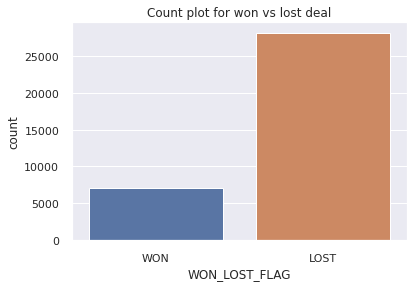

In [158]:
sns.countplot(x='WON_LOST_FLAG', data=df).set_title('Count plot for won vs lost deal')

most of the deals were lost compared to won . lets calculate exact percentages

- Using groupby

In [159]:
df.groupby(['WON_LOST_FLAG'])['WON_LOST_FLAG'].count()

WON_LOST_FLAG
LOST    28228
WON      7086
Name: WON_LOST_FLAG, dtype: int64

Note that  28228 opportunity were lost and 7086 oppotunity won

In [160]:
df.groupby(['WON_LOST_FLAG','GEO'])['WON_LOST_FLAG'].count()

WON_LOST_FLAG  GEO     
LOST           AMERICAS    14066
               AP           4326
               EMEA         8468
               FED          1368
WON            AMERICAS     2992
               AP           1106
               EMEA         2776
               FED           212
Name: WON_LOST_FLAG, dtype: int64

In [161]:
df.groupby(['WON_LOST_FLAG','LICENSE_TYPE'])['WON_LOST_FLAG'].count()

WON_LOST_FLAG  LICENSE_TYPE
LOST           NEW             28213
               RENEWAL            15
WON            NEW              7086
Name: WON_LOST_FLAG, dtype: int64

In [162]:
df.groupby(['WON_LOST_FLAG','PRODUCT'])['WON_LOST_FLAG'].count()

WON_LOST_FLAG  PRODUCT     
LOST           AUTOMATION       6352
               SERVICE DESK    13234
               WORKFLOW         8642
WON            AUTOMATION       1927
               SERVICE DESK     3725
               WORKFLOW         1434
Name: WON_LOST_FLAG, dtype: int64

In [163]:
df.groupby(['WON_LOST_FLAG','ACCOUNT_SEGMENT'])['WON_LOST_FLAG'].count()

WON_LOST_FLAG  ACCOUNT_SEGMENT
LOST           GOSI                 47
               Tier 1              747
               Tier 2a            4811
               Tier 2b            5473
               Tier 3a            3009
               Tier 3b            1362
               Tier 4             2858
               Tier 5             9921
WON            GOSI                  7
               Tier 1              124
               Tier 2a            1471
               Tier 2b            1312
               Tier 3a            1373
               Tier 3b             237
               Tier 4              596
               Tier 5             1966
Name: WON_LOST_FLAG, dtype: int64

In [164]:
df.groupby(['ACCOUNT_SEGMENT'])['WON_LOST_FLAG'].count()

ACCOUNT_SEGMENT
GOSI          54
Tier 1       871
Tier 2a     6282
Tier 2b     6785
Tier 3a     4382
Tier 3b     1599
Tier 4      3454
Tier 5     11887
Name: WON_LOST_FLAG, dtype: int64

In [165]:
df.groupby(['WON_LOST_FLAG','OPPORTUNITY_SOURCE'])['WON_LOST_FLAG'].count()

WON_LOST_FLAG  OPPORTUNITY_SOURCE       
LOST           FIELD                        14256
               ISD                           3182
               MARKETING                      522
               MARKETING SALES GENERATED     1762
               MSP                           4176
               PARTNER                       4330
WON            FIELD                         4832
               ISD                            327
               MARKETING SALES GENERATED      721
               MSP                            406
               PARTNER                        800
Name: WON_LOST_FLAG, dtype: int64

In [166]:
df.groupby(['OPPORTUNITY_SOURCE'])['WON_LOST_FLAG'].count()

OPPORTUNITY_SOURCE
FIELD                        19088
ISD                           3509
MARKETING                      522
MARKETING SALES GENERATED     2483
MSP                           4582
PARTNER                       5130
Name: WON_LOST_FLAG, dtype: int64

- Using factorplot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Factor plot for LICENSE_TYPE')

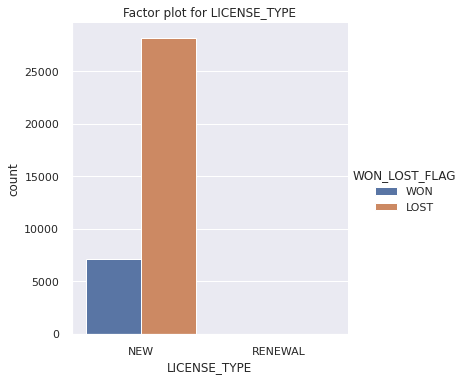

In [167]:
sns.factorplot('LICENSE_TYPE', hue='WON_LOST_FLAG', kind='count', data=df);
plt.title('Factor plot for LICENSE_TYPE')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Factor plot for ACCOUNT SEGMENT')

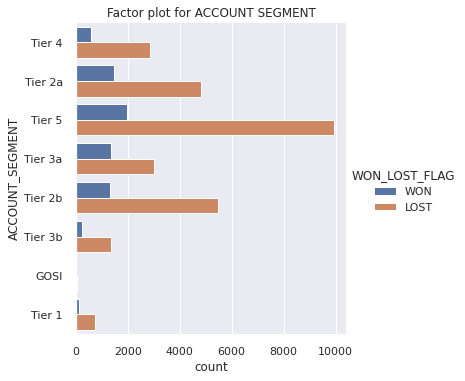

In [168]:
sns.factorplot(y='ACCOUNT_SEGMENT', hue='WON_LOST_FLAG', kind='count', data=df);
plt.title('Factor plot for ACCOUNT SEGMENT')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Factor plot for OPPORTUNITY SOURCE')

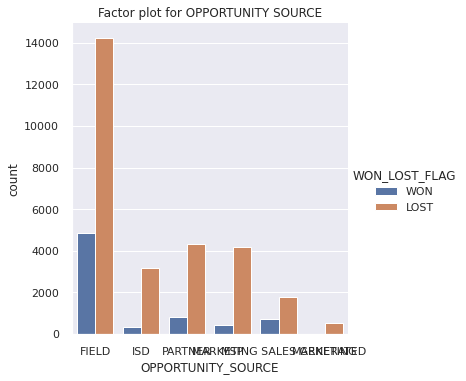

In [169]:

sns.factorplot('OPPORTUNITY_SOURCE', hue='WON_LOST_FLAG', kind='count', data=df);
plt.title('Factor plot for OPPORTUNITY SOURCE')

To know the exact %

In [170]:
df['WON_LOST_NUM'] = df.apply(lambda x: 1 if x['WON_LOST_FLAG'] == 'WON' else 0 ,axis=1)

In [171]:
df.tail(100)

,Opportunity_ID,Create_to_Close,WON_LOST_FLAG,PRODUCT,LICENSE_TYPE,GEO,ACCOUNT_SEGMENT,OPPORTUNITY_SOURCE,PIPELINE_Dollar,Member_Flag,Count_of_Email,Sum_of_Logins,Login_Flag,Sum_login_bf_closed,Sum_of_Content_Creation,Content_creation_Flag,Sum_of_Eng_others_content,Eng_Others_content_Flg,Sum_of_Follow,Follow_Flag,Login_New_Flag,Sum_of_Other_challenges,Other_Challenges_Flag,Sum_of_Profile_update,ProfileUpdate_Flag,Sum_of_Survey,Survey_Flag,Sum_of_Welcome_Back,Welcome_back_flag,Sum_of_Only_Login,Only_Login_Flag,Sum_of_SentEmails,Sum_of_opened_Emails,Sum_of_clicked_Emails,Sum_of_responded_Marketing_Act,WON_LOST_NUM
35214,ID-2pQAE,296,LOST,WORKFLOW,NEW,FED,Tier 1,FIELD,84064.225070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
35215,ID-CdQAM,232,LOST,WORKFLOW,NEW,FED,Tier 2a,MSP,28021.408360,1.0,1.0,83.0,1.0,0.0,9.0,1.0,10.0,1.0,0.0,0.0,1.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,36.0,0.0,0,0
35216,ID-CTQA2,232,LOST,WORKFLOW,NEW,FED,Tier 2a,MSP,42032.112530,1.0,1.0,83.0,1.0,0.0,9.0,1.0,10.0,1.0,0.0,0.0,1.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,36.0,0.0,0,0
35217,ID-fiQAE,292,LOST,WORKFLOW,NEW,FED,Tier 1,FIELD,49709.418000,1.0,5.0,107.0,1.0,0.0,9.0,1.0,18.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,722.0,11.0,1.0,0,0
35218,ID-MAQA2,61,LOST,WORKFLOW,NEW,FED,Tier 1,FIELD,5604.281671,1.0,1.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35309,ID-YtQAM,135,LOST,WORKFLOW,NEW,FED,Tier 2a,FIELD,21016.056270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
35310,ID-YaQAM,212,LOST,WORKFLOW,NEW,FED,Tier 2a,MSP,21016.056270,1.0,4.0,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,346.0,21.0,3.0,0,0
35311,ID-5CQAQ,9,LOST,WORKFLOW,NEW,FED,Tier 2a,PARTNER,14010.704180,1.0,3.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,593.0,23.0,14.0,0,0
35312,ID-83QAA,69,LOST,WORKFLOW,NEW,FED,Tier 2a,FIELD,84064.225070,1.0,3.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,593.0,23.0,14.0,0,0


In [172]:
print("% of Gosi acc segment WON : " , df[df.ACCOUNT_SEGMENT == 'GOSI']['WON_LOST_NUM'].sum()/df[df.ACCOUNT_SEGMENT == 'GOSI']['WON_LOST_NUM'].count())
print("% of Tier 1 WON       :   " , df[df.ACCOUNT_SEGMENT == 'Tier 1']['WON_LOST_NUM'].sum()/df[df.ACCOUNT_SEGMENT == 'Tier 1']['WON_LOST_NUM'].count())
print("% of Tier 2a WON-LOST FLAG:   " , df[df.ACCOUNT_SEGMENT == 'Tier 2a']['WON_LOST_NUM'].sum()/df[df.ACCOUNT_SEGMENT == 'Tier 2a']['WON_LOST_NUM'].count())
print("% of Tier 2b WON-LOST FLAG:   " , df[df.ACCOUNT_SEGMENT == 'Tier 2b']['WON_LOST_NUM'].sum()/df[df.ACCOUNT_SEGMENT == 'Tier 2b']['WON_LOST_NUM'].count())

% of Gosi acc segment WON :  0.12962962962962962
% of Tier 1 WON       :    0.1423650975889782
% of Tier 2a WON-LOST FLAG:    0.23416109519261383
% of Tier 2b WON-LOST FLAG:    0.19336772291820192


Text(0.5, 1.0, 'ACCOUNT SEGMENT (Tier 2a)')

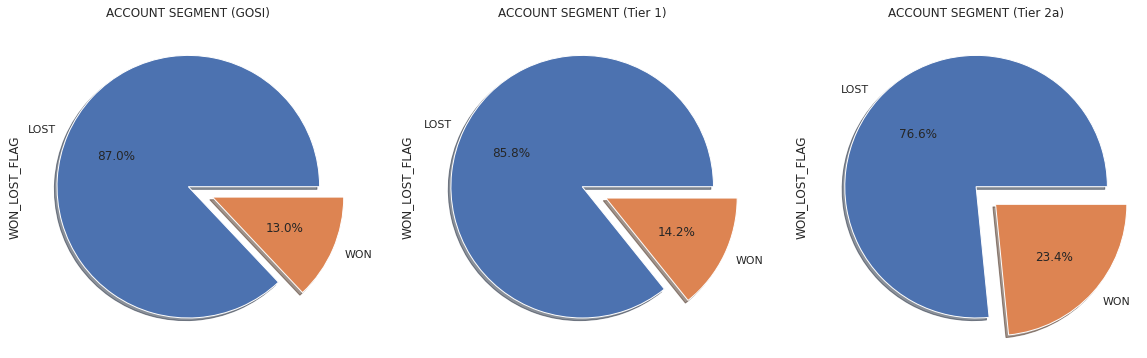

In [173]:
f,ax = plt.subplots(1,3,figsize=(20,7))
df['WON_LOST_FLAG'][df['ACCOUNT_SEGMENT'] == 'GOSI'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['WON_LOST_FLAG'][df['ACCOUNT_SEGMENT'] == 'Tier 1'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
df['WON_LOST_FLAG'][df['ACCOUNT_SEGMENT'] == 'Tier 2a'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)

ax[0].set_title('ACCOUNT SEGMENT (GOSI)')
ax[1].set_title('ACCOUNT SEGMENT (Tier 1)')
ax[2].set_title('ACCOUNT SEGMENT (Tier 2a)')


Text(0.5, 1.0, 'ACCOUNT SEGMENT (Tier 4)')

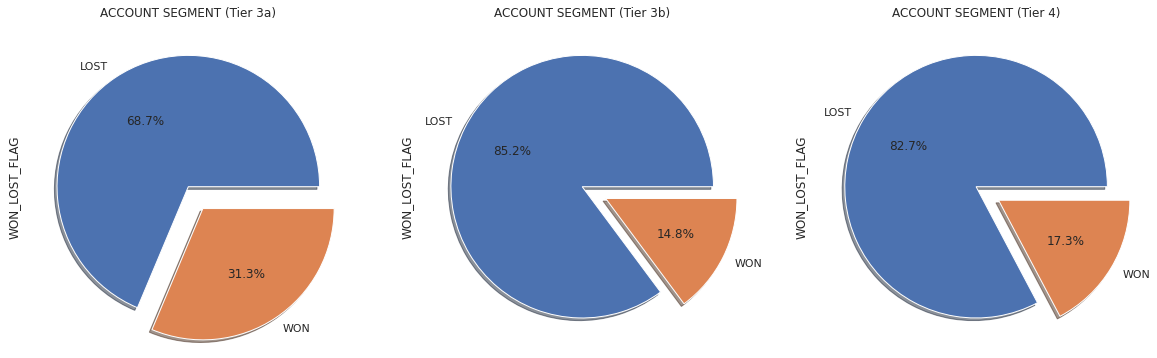

In [174]:
f,ax = plt.subplots(1,3,figsize=(20,7))
df['WON_LOST_FLAG'][df['ACCOUNT_SEGMENT'] == 'Tier 3a'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['WON_LOST_FLAG'][df['ACCOUNT_SEGMENT'] == 'Tier 3b'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
df['WON_LOST_FLAG'][df['ACCOUNT_SEGMENT'] == 'Tier 4'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
#df['WON-LOST FLAG'][df['ACCOUNT SEGMENT'] == 'Tier 5'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True)
ax[0].set_title('ACCOUNT SEGMENT (Tier 3a)')
ax[1].set_title('ACCOUNT SEGMENT (Tier 3b)')
ax[2].set_title('ACCOUNT SEGMENT (Tier 4)')


Text(0.5, 1.0, 'ACCOUNT SEGMENT (Tier 5)')

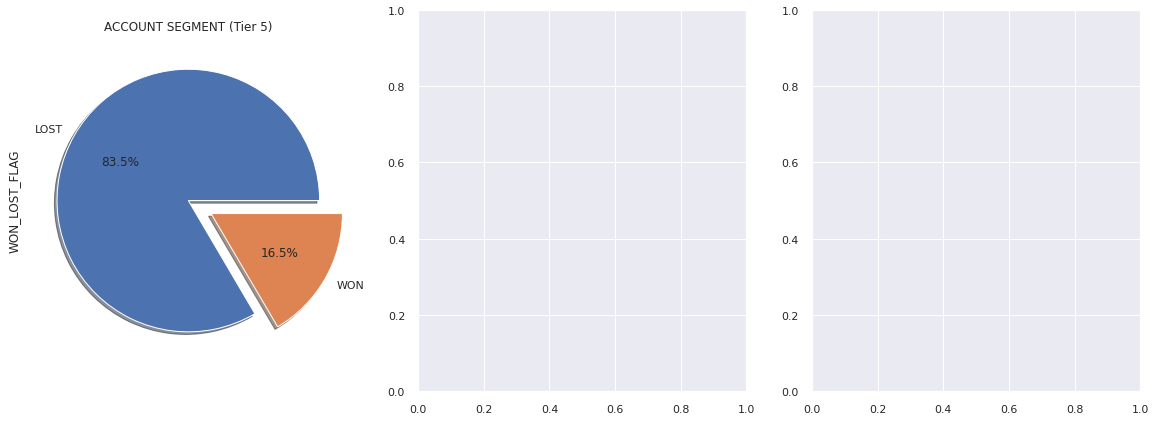

In [175]:
f,ax = plt.subplots(1,3,figsize=(20,7))
df['WON_LOST_FLAG'][df['ACCOUNT_SEGMENT'] == 'Tier 5'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('ACCOUNT SEGMENT (Tier 5)')


In [176]:
df.columns

Index(['Opportunity_ID', 'Create_to_Close', 'WON_LOST_FLAG', 'PRODUCT',
       'LICENSE_TYPE', 'GEO', 'ACCOUNT_SEGMENT', 'OPPORTUNITY_SOURCE',
       'PIPELINE_Dollar', 'Member_Flag', 'Count_of_Email', 'Sum_of_Logins',
       'Login_Flag', 'Sum_login_bf_closed', 'Sum_of_Content_Creation',
       'Content_creation_Flag', 'Sum_of_Eng_others_content',
       'Eng_Others_content_Flg', 'Sum_of_Follow', 'Follow_Flag',
       'Login_New_Flag', 'Sum_of_Other_challenges', 'Other_Challenges_Flag',
       'Sum_of_Profile_update', 'ProfileUpdate_Flag', 'Sum_of_Survey',
       'Survey_Flag', 'Sum_of_Welcome_Back', 'Welcome_back_flag',
       'Sum_of_Only_Login', 'Only_Login_Flag', 'Sum_of_SentEmails',
       'Sum_of_opened_Emails', 'Sum_of_clicked_Emails',
       'Sum_of_responded_Marketing_Act', 'WON_LOST_NUM'],
      dtype='object')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35314 entries, 0 to 35313
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Opportunity_ID                  35314 non-null  object 
 1   Create_to_Close                 35314 non-null  int64  
 2   WON_LOST_FLAG                   35314 non-null  object 
 3   PRODUCT                         35314 non-null  object 
 4   LICENSE_TYPE                    35314 non-null  object 
 5   GEO                             35314 non-null  object 
 6   ACCOUNT_SEGMENT                 35314 non-null  object 
 7   OPPORTUNITY_SOURCE              35314 non-null  object 
 8   PIPELINE_Dollar                 35314 non-null  float64
 9   Member_Flag                     15287 non-null  float64
 10  Count_of_Email                  15287 non-null  float64
 11  Sum_of_Logins                   15287 non-null  float64
 12  Login_Flag                      

In [178]:
df_mbr = df[df['Member_Flag'] == 1]

In [179]:
#df_mbr['Member_Flag'].nunique.count()


df_mbr.groupby(['Member_Flag'])['Member_Flag'].count()

Member_Flag
1.0    15287
Name: Member_Flag, dtype: int64

In [180]:
df_mbr['Member_Flag'].count()

15287

In [181]:
print('Contains Redundant Records?:', df_mbr.duplicated().any())
print('Duplicate Count:', df_mbr.duplicated().sum())

Contains Redundant Records?: False
Duplicate Count: 0


In [182]:
df_mbr.head()

,Opportunity_ID,Create_to_Close,WON_LOST_FLAG,PRODUCT,LICENSE_TYPE,GEO,ACCOUNT_SEGMENT,OPPORTUNITY_SOURCE,PIPELINE_Dollar,Member_Flag,Count_of_Email,Sum_of_Logins,Login_Flag,Sum_login_bf_closed,Sum_of_Content_Creation,Content_creation_Flag,Sum_of_Eng_others_content,Eng_Others_content_Flg,Sum_of_Follow,Follow_Flag,Login_New_Flag,Sum_of_Other_challenges,Other_Challenges_Flag,Sum_of_Profile_update,ProfileUpdate_Flag,Sum_of_Survey,Survey_Flag,Sum_of_Welcome_Back,Welcome_back_flag,Sum_of_Only_Login,Only_Login_Flag,Sum_of_SentEmails,Sum_of_opened_Emails,Sum_of_clicked_Emails,Sum_of_responded_Marketing_Act,WON_LOST_NUM
0,ID-Q6AAI,369,WON,AUTOMATION,NEW,AMERICAS,Tier 4,FIELD,13257.10763,1.0,3.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,366.0,107.0,8.0,0,1
1,ID-4dAAA,449,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,860196.19470,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0,1
2,ID-KQAAY,442,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,220458.43020,1.0,1.0,21.0,1.0,12.0,0.0,0.0,0.0,0.0,45.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,8.0,1.0,0,1
3,ID-hvAAA,447,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,109701.34500,1.0,22.0,209.0,1.0,145.0,107.0,1.0,76.0,1.0,0.0,0.0,1.0,50.0,1.0,50.0,1.0,0.0,0.0,100.0,1.0,5.0,1.0,2339.0,447.0,123.0,0,1
4,ID-ieAAA,448,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,223537.27410,1.0,12.0,82.0,1.0,29.0,33.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,711.0,233.0,22.0,0,1


In [183]:
df_tmp1 = df_mbr.drop('Member_Flag', axis = 1)

df_tmp1.head()

,Opportunity_ID,Create_to_Close,WON_LOST_FLAG,PRODUCT,LICENSE_TYPE,GEO,ACCOUNT_SEGMENT,OPPORTUNITY_SOURCE,PIPELINE_Dollar,Count_of_Email,Sum_of_Logins,Login_Flag,Sum_login_bf_closed,Sum_of_Content_Creation,Content_creation_Flag,Sum_of_Eng_others_content,Eng_Others_content_Flg,Sum_of_Follow,Follow_Flag,Login_New_Flag,Sum_of_Other_challenges,Other_Challenges_Flag,Sum_of_Profile_update,ProfileUpdate_Flag,Sum_of_Survey,Survey_Flag,Sum_of_Welcome_Back,Welcome_back_flag,Sum_of_Only_Login,Only_Login_Flag,Sum_of_SentEmails,Sum_of_opened_Emails,Sum_of_clicked_Emails,Sum_of_responded_Marketing_Act,WON_LOST_NUM
0,ID-Q6AAI,369,WON,AUTOMATION,NEW,AMERICAS,Tier 4,FIELD,13257.10763,3.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,366.0,107.0,8.0,0,1
1,ID-4dAAA,449,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,860196.19470,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0,1
2,ID-KQAAY,442,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,220458.43020,1.0,21.0,1.0,12.0,0.0,0.0,0.0,0.0,45.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,8.0,1.0,0,1
3,ID-hvAAA,447,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,109701.34500,22.0,209.0,1.0,145.0,107.0,1.0,76.0,1.0,0.0,0.0,1.0,50.0,1.0,50.0,1.0,0.0,0.0,100.0,1.0,5.0,1.0,2339.0,447.0,123.0,0,1
4,ID-ieAAA,448,WON,AUTOMATION,NEW,AMERICAS,Tier 2a,FIELD,223537.27410,12.0,82.0,1.0,29.0,33.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,711.0,233.0,22.0,0,1


In [184]:
##cols1 = ['WON_LOST_FLAG','WON_LOST_NUM','Count_of_Email', 'Sum_of_Logins','Login_Flag', 'Sum_of_Content_Creation',
 ##      'Content_creation_Flag', 'Sum_of_Eng_others_content',
 ##      'Eng_Others_content_Flg', 'Sum of Follow', 'Follow_Flag',
 #      'Login_New_Flag', 'Sum of Other_challenges', 'Other_Challenges_Flag',
 ##      'Sum_of_Profile_update', 'ProfileUpdate_Flag', 'Sum_of_Survey',
  #     'Survey_Flag', 'Sum_of_Welcome_Back', 'Welcome_back_flag',
  #     'Sum_of_Only_Login', 'Only_Login_Flag', 'Sum_of_Sent Emails',
  ##     'Sum_of_opened_Emails', 'Sum_of_clicked_Emails'
  ##     ]
#df1 = df_mbr[cols1];
#df1.head()

Text(0.5, 1.0, 'Correlation between features')

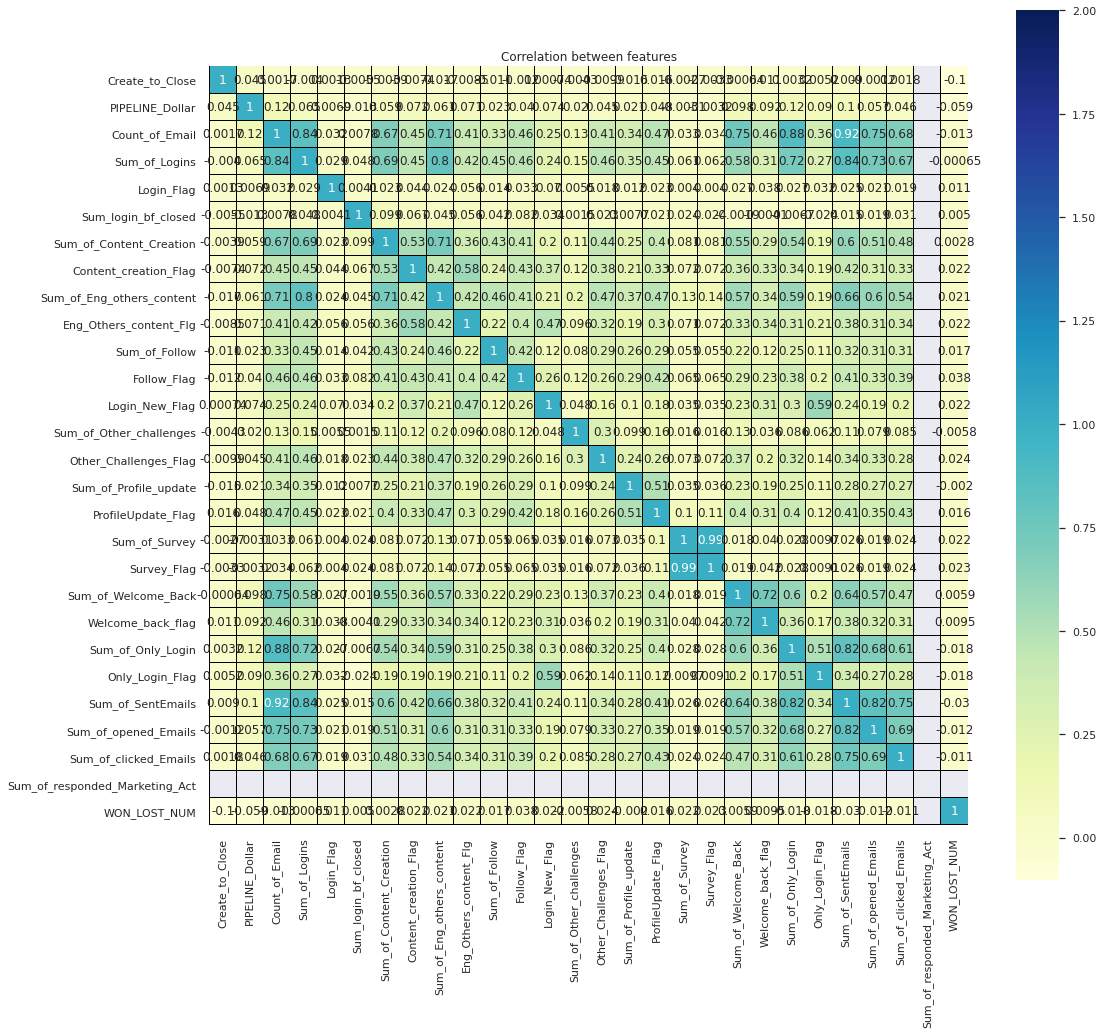

In [185]:
corr = df_tmp1.corr()
plt.figure(figsize=(17,16))
sns.heatmap(corr,vmax=2,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

Looking at the heatmap 
We can see that WON_LOST_NUM is not highly co-related with any of the variables however its weekly postively correlated with login_flag , sum of content creation , content creation_flag , sum of enagenment , enagement flag 
follow flag , other challenge flag ,  profile update flag , sum of survey etc

Negatively correlated with sum of clicked emails , sum of opened emails , only login flag , sum of profile update , count of emails and sum of logins .

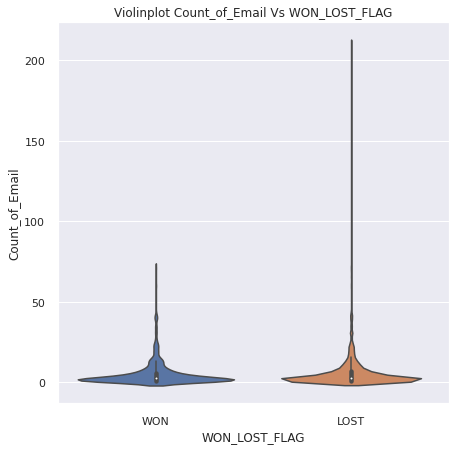

In [186]:
plt.figure(figsize=(7,7))
sns.violinplot(y='Count_of_Email',x='WON_LOST_FLAG', kind='point', data = df_tmp1)
plt.title('Violinplot Count_of_Email Vs WON_LOST_FLAG')
plt.show()

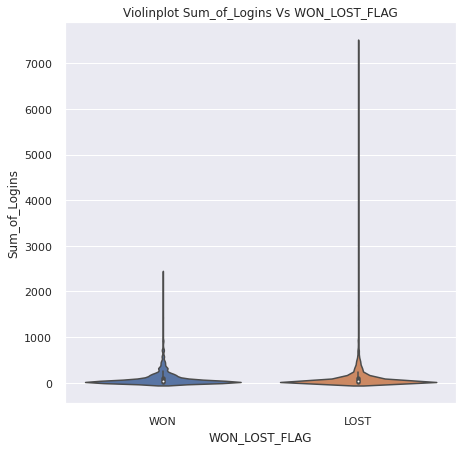

In [187]:
plt.figure(figsize=(7,7))
sns.violinplot(y='Sum_of_Logins',x='WON_LOST_FLAG', kind='point', data = df_tmp1)
plt.title('Violinplot Sum_of_Logins Vs WON_LOST_FLAG')
plt.show()

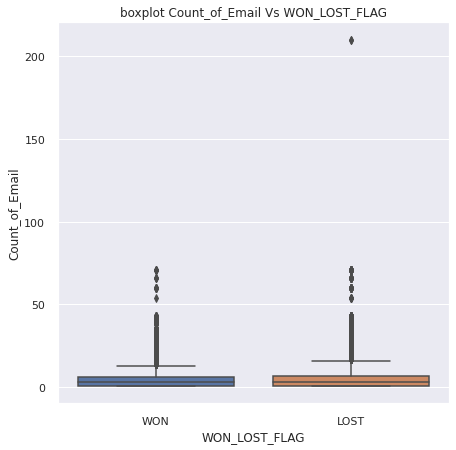

In [188]:
plt.figure(figsize=(7,7))
sns.boxplot(y="Count_of_Email", x="WON_LOST_FLAG", data = df_tmp1)
plt.title('boxplot Count_of_Email Vs WON_LOST_FLAG')
plt.show()

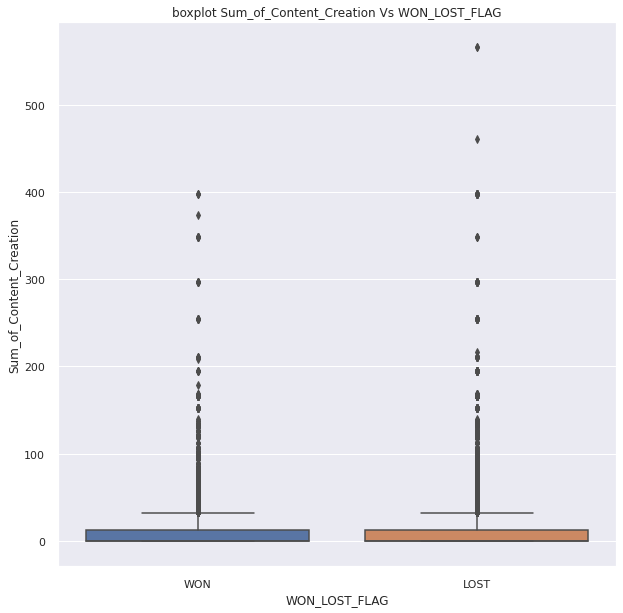

In [189]:
plt.figure(figsize=(10,10))
sns.boxplot(y="Sum_of_Content_Creation", x="WON_LOST_FLAG", data = df_tmp1)

plt.title('boxplot Sum_of_Content_Creation Vs WON_LOST_FLAG')
plt.show()

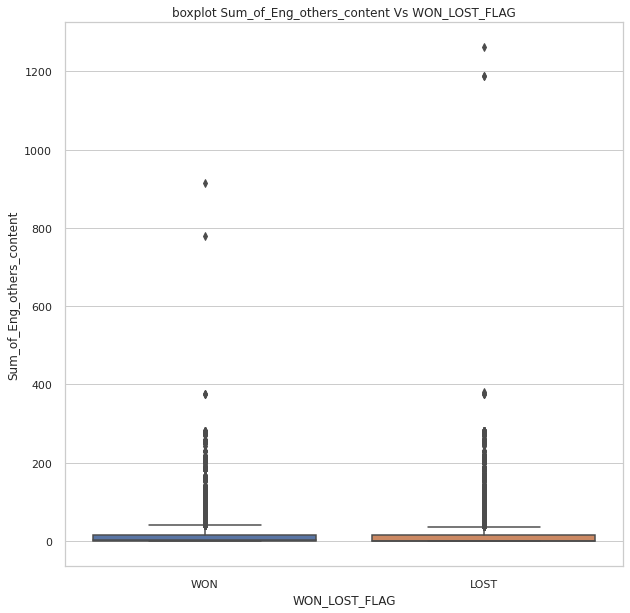

In [190]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.boxplot(y="Sum_of_Eng_others_content", x="WON_LOST_FLAG", data = df_tmp1)

plt.title('boxplot Sum_of_Eng_others_content Vs WON_LOST_FLAG')
plt.show()

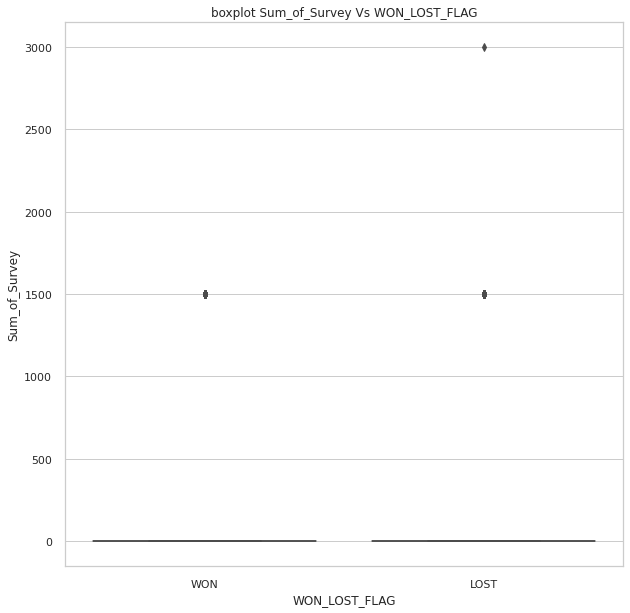

In [191]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.boxplot(y="Sum_of_Survey", x="WON_LOST_FLAG", data = df_tmp1)

plt.title('boxplot Sum_of_Survey Vs WON_LOST_FLAG')
plt.show()




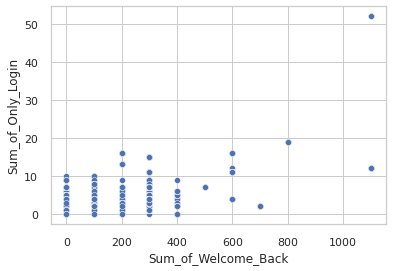

In [192]:
sns.scatterplot(x="Sum_of_Welcome_Back",
                    y="Sum_of_Only_Login",
                    data=df_tmp1)

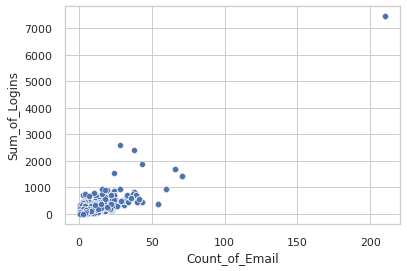

In [193]:
sns.scatterplot(x="Count_of_Email",
                    y="Sum_of_Logins",
                    data=df_tmp1)

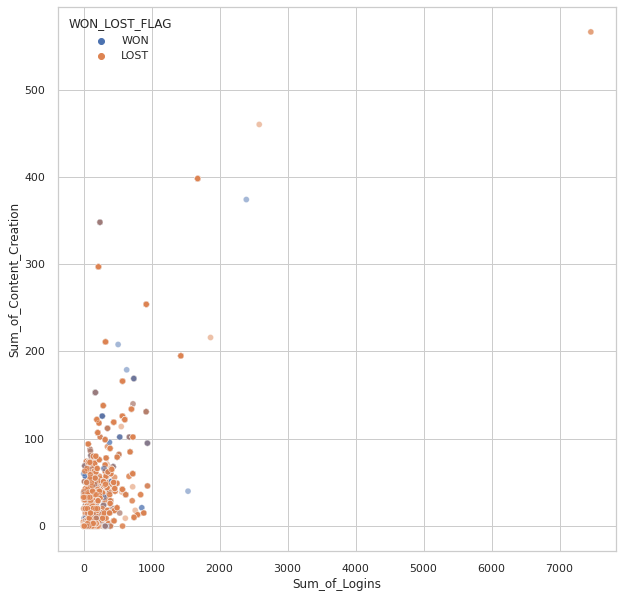

In [194]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Sum_of_Logins",y="Sum_of_Content_Creation",hue='WON_LOST_FLAG', alpha=0.5,data=df_tmp1)

In [195]:

df_tmp2 = pd.get_dummies(data = df_tmp1, columns = ['PRODUCT','LICENSE_TYPE','GEO','ACCOUNT_SEGMENT','OPPORTUNITY_SOURCE'])
df_tmp2.head()

,Opportunity_ID,Create_to_Close,WON_LOST_FLAG,PIPELINE_Dollar,Count_of_Email,Sum_of_Logins,Login_Flag,Sum_login_bf_closed,Sum_of_Content_Creation,Content_creation_Flag,Sum_of_Eng_others_content,Eng_Others_content_Flg,Sum_of_Follow,Follow_Flag,Login_New_Flag,Sum_of_Other_challenges,Other_Challenges_Flag,Sum_of_Profile_update,ProfileUpdate_Flag,Sum_of_Survey,Survey_Flag,Sum_of_Welcome_Back,Welcome_back_flag,Sum_of_Only_Login,Only_Login_Flag,Sum_of_SentEmails,Sum_of_opened_Emails,Sum_of_clicked_Emails,Sum_of_responded_Marketing_Act,WON_LOST_NUM,PRODUCT_AUTOMATION,PRODUCT_SERVICE DESK,PRODUCT_WORKFLOW,LICENSE_TYPE_NEW,LICENSE_TYPE_RENEWAL,GEO_AMERICAS,GEO_AP,GEO_EMEA,GEO_FED,ACCOUNT_SEGMENT_GOSI,ACCOUNT_SEGMENT_Tier 1,ACCOUNT_SEGMENT_Tier 2a,ACCOUNT_SEGMENT_Tier 2b,ACCOUNT_SEGMENT_Tier 3a,ACCOUNT_SEGMENT_Tier 3b,ACCOUNT_SEGMENT_Tier 4,ACCOUNT_SEGMENT_Tier 5,OPPORTUNITY_SOURCE_FIELD,OPPORTUNITY_SOURCE_ISD,OPPORTUNITY_SOURCE_MARKETING,OPPORTUNITY_SOURCE_MARKETING SALES GENERATED,OPPORTUNITY_SOURCE_MSP,OPPORTUNITY_SOURCE_PARTNER
0,ID-Q6AAI,369,WON,13257.10763,3.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,366.0,107.0,8.0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,ID-4dAAA,449,WON,860196.19470,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,ID-KQAAY,442,WON,220458.43020,1.0,21.0,1.0,12.0,0.0,0.0,0.0,0.0,45.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,8.0,1.0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,ID-hvAAA,447,WON,109701.34500,22.0,209.0,1.0,145.0,107.0,1.0,76.0,1.0,0.0,0.0,1.0,50.0,1.0,50.0,1.0,0.0,0.0,100.0,1.0,5.0,1.0,2339.0,447.0,123.0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,ID-ieAAA,448,WON,223537.27410,12.0,82.0,1.0,29.0,33.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,711.0,233.0,22.0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [196]:
df_tmp2.columns

Index(['Opportunity_ID', 'Create_to_Close', 'WON_LOST_FLAG', 'PIPELINE_Dollar',
       'Count_of_Email', 'Sum_of_Logins', 'Login_Flag', 'Sum_login_bf_closed',
       'Sum_of_Content_Creation', 'Content_creation_Flag',
       'Sum_of_Eng_others_content', 'Eng_Others_content_Flg', 'Sum_of_Follow',
       'Follow_Flag', 'Login_New_Flag', 'Sum_of_Other_challenges',
       'Other_Challenges_Flag', 'Sum_of_Profile_update', 'ProfileUpdate_Flag',
       'Sum_of_Survey', 'Survey_Flag', 'Sum_of_Welcome_Back',
       'Welcome_back_flag', 'Sum_of_Only_Login', 'Only_Login_Flag',
       'Sum_of_SentEmails', 'Sum_of_opened_Emails', 'Sum_of_clicked_Emails',
       'Sum_of_responded_Marketing_Act', 'WON_LOST_NUM', 'PRODUCT_AUTOMATION',
       'PRODUCT_SERVICE DESK', 'PRODUCT_WORKFLOW', 'LICENSE_TYPE_NEW',
       'LICENSE_TYPE_RENEWAL', 'GEO_AMERICAS', 'GEO_AP', 'GEO_EMEA', 'GEO_FED',
       'ACCOUNT_SEGMENT_GOSI', 'ACCOUNT_SEGMENT_Tier 1',
       'ACCOUNT_SEGMENT_Tier 2a', 'ACCOUNT_SEGMENT_Tier 2b',
  

In [197]:
X = df_tmp2.drop(['Opportunity_ID','WON_LOST_NUM','WON_LOST_FLAG'], axis = 1)
y = df_tmp2['WON_LOST_NUM']

# Remove two columns name is 'C' and 'D' 
#df.drop(['C', 'D'], axis = 1) 



In [198]:
pip install yellowbrick

In [199]:
!pip install yellowbrick

In [200]:
# For Preprocessing
from sklearn.preprocessing import StandardScaler

# For Feature Selection
from sklearn.feature_selection import SelectFromModel

# For Feature Importances
from yellowbrick.model_selection import FeatureImportances

# For metrics evaluation
from sklearn.metrics import precision_recall_curve, classification_report, plot_confusion_matrix

# For Data Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [201]:
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 9
Threshold set by Model: 0.02
Features: ['Create_to_Close', 'PIPELINE_Dollar', 'Count_of_Email', 'Sum_of_Logins', 'Sum_of_Content_Creation', 'Sum_of_Eng_others_content', 'Sum_of_SentEmails', 'Sum_of_opened_Emails', 'Sum_of_clicked_Emails']


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


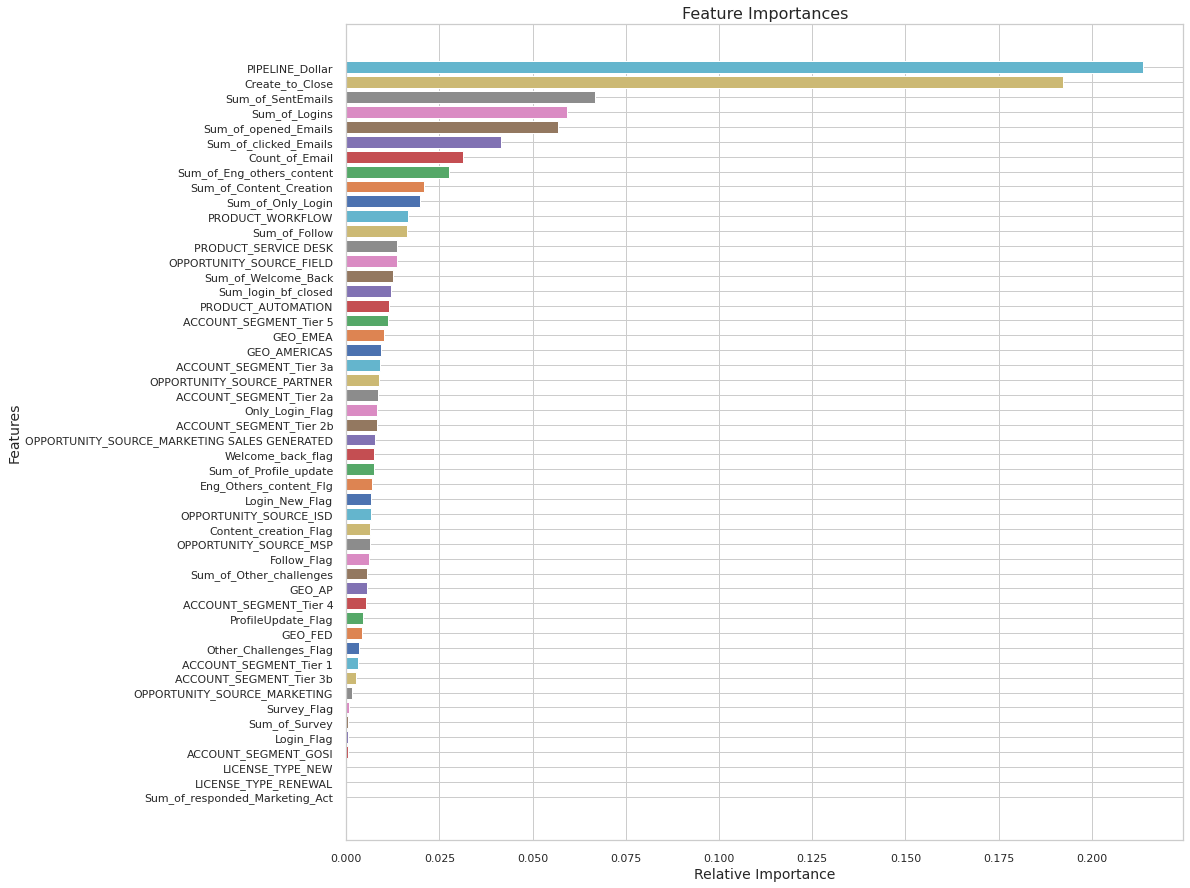

In [203]:
# Have some patience, may take some time :)
figure = plt.figure(figsize = [15, 15])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (12229, 50) (12229,)
Testing Data Shape: (3058, 50) (3058,)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


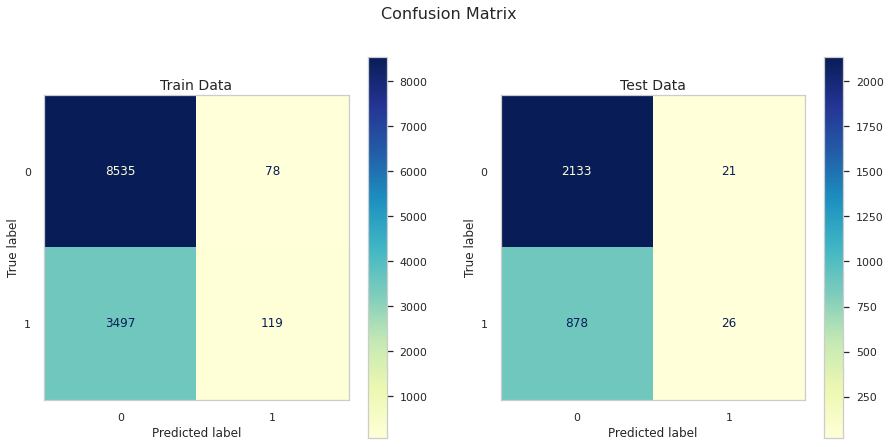

In [205]:
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)

y_train_pred_count = log.predict(X_train)
y_test_pred_count = log.predict(X_test)

y_train_pred_proba = log.predict_proba(X_train)
y_test_pred_proba = log.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = log, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = log, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [206]:
logistic_report_train = classification_report(y_train, y_train_pred_count)
logistic_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(logistic_report_train)
print('                    Testing Report           ')
print(logistic_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      8613
           1       0.60      0.03      0.06      3616

    accuracy                           0.71     12229
   macro avg       0.66      0.51      0.44     12229
weighted avg       0.68      0.71      0.60     12229

                    Testing Report           
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      2154
           1       0.55      0.03      0.05       904

    accuracy                           0.71      3058
   macro avg       0.63      0.51      0.44      3058
weighted avg       0.66      0.71      0.60      3058



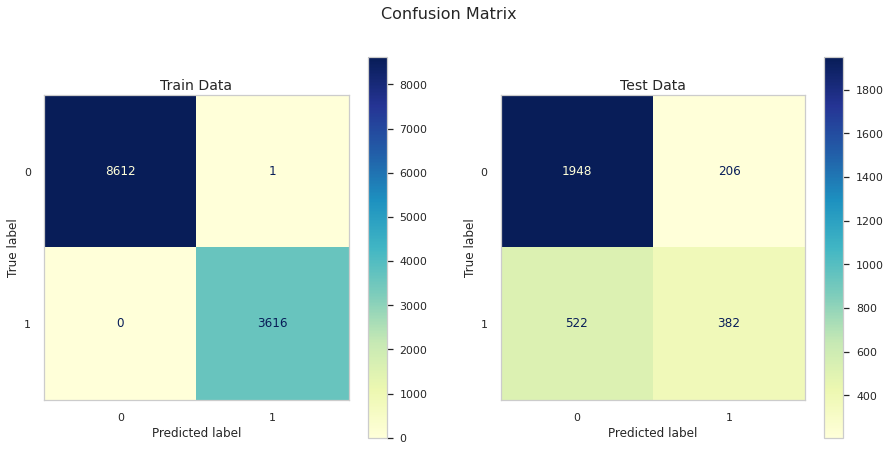

In [219]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)

y_train_pred_count = rfc.predict(X_train)
y_test_pred_count = rfc.predict(X_test)

y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = rfc, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = rfc, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [220]:
rfc_report_train = classification_report(y_train, y_train_pred_count)
rfc_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(rfc_report_train)
print('                    Testing Report           ')
print(rfc_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8613
           1       1.00      1.00      1.00      3616

    accuracy                           1.00     12229
   macro avg       1.00      1.00      1.00     12229
weighted avg       1.00      1.00      1.00     12229

                    Testing Report           
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      2154
           1       0.65      0.42      0.51       904

    accuracy                           0.76      3058
   macro avg       0.72      0.66      0.68      3058
weighted avg       0.75      0.76      0.74      3058

